In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('language_data_with_dates.csv')
#codes where df[df['ascl-id'] == 0] need to be dealt with when thinking about dates

In [3]:
#A pie chart of the total language stats

#cast the Bytes column to int64
df = df[pd.to_numeric(df.Bytes,errors='coerce').notnull()]
df.Bytes = df['Bytes'].astype(str).astype(int)
df.sort_values(by='Bytes', ascending=False)

#group the rows by languages and sum on the Bytes column
lang = df.groupby('Language', as_index=False)['Bytes'].sum()

#Sed takes up a lot because one repository was
#using the file extension for their own data, not code
#Jupyter notebooks can be excluded, since they may contain 
#images which can artificially inflate the size
lang = lang[lang['Language'] != "sed"]
lang = lang[lang['Language'] != "Jupyter Notebook"]

#create a new column for the percent that language occupies
lang['% of total'] = lang.Bytes / lang.Bytes.sum() * 100

#filtering out irrelevant data
lang = lang[lang['% of total'] > 0.001]

lang = lang.sort_values(by='% of total', ascending=False)

#Pie chart time!

#this creates a pie chart without consolidating languages
'''
fig1, ax1 = plt.subplots()
ax1.pie(lang[lang.columns[1]], labels=lang[lang.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
'''

"\nfig1, ax1 = plt.subplots()\nax1.pie(lang[lang.columns[1]], labels=lang[lang.columns[0]], autopct='%1.1f%%',\n        shadow=True, startangle=90)\nax1.axis('equal')\n"

                                   Language      Bytes  % of total
0                                    Python  289004288   18.163067
1                                   Fortran  263411241   16.554619
2                                         C  244733012   15.380748
3                                       C++  218327962   13.721268
4   All other languages, each < 2% of total  191282135   12.021518
5                                      HTML   95307284    5.989782
6                                      Java   63113450    3.966494
7                                     Shell   54842464    3.446687
8                                      Ruby   53948642    3.390513
9                                       TeX   44539192    2.799157
10                             OpenEdge ABL   36927794    2.320803
11                                      IDL   35571569    2.235568


(-1.1125275989249963,
 1.1061580341722685,
 -1.101081319684025,
 1.1000514928489695)

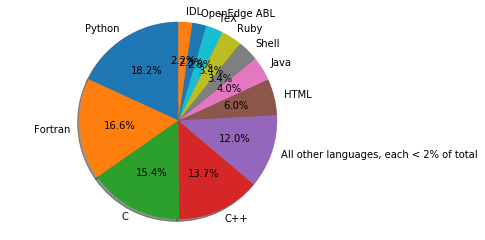

In [4]:
#Now, create a pie chart with languages <2% consolidated into one "Other Languages" entry

#calculate percent sum
#calculate bytes sum
#filter lang dataframe for > 2%
#create new dataframe row of sum data and append to filtered dataframe

find_sum = lang[lang['% of total'] < 2].sum()

pct_sum = find_sum['% of total']
bytes_sum = find_sum['Bytes']

new_row = ["All other languages, each < 2% of total",
          bytes_sum,
          pct_sum]

most = lang[lang['% of total'] >= 2].reset_index().drop(columns=['index'])
most.loc[len(most)] = new_row
most = most.sort_values(by='% of total', ascending=False).reset_index().drop(columns=['index'])
print(most)


fig2, ax2 = plt.subplots()
ax2.pie(most[most.columns[1]], labels=most[most.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

In [53]:
#function to return the correct year depending on the first 2 digits of the ascl-id
def ascl_year(row):
    year = str(row['ascl-id'])[0:2]
    try:
        year = int(year)
    except:
        year = float(year)
    if year > 89:
        return 1900+int(year)
    elif year == 0:
        return None
    else:
        return 2000+int(year)

#now, a function to generate the repo year
def repo_year(row):
    return row['repo_date'][0:4]

df['ascl_year'] = df.apply (lambda row: ascl_year(row), axis=1)
df.ascl_year = df.ascl_year.fillna(0.0).astype(int)
df['repo_year'] = df.apply (lambda row: repo_year(row), axis=1)
df.repo_year = df.repo_year.fillna("0").astype(int)

In [161]:
#link to how to get stacked area chart
#https://python-graph-gallery.com/255-percentage-stacked-area-chart/

#x axis - year
#y axis - percentage of the total
#for each language, we need an array of languages over years

#let's only take a look at the most popular languages

#each language is a separate row
#each column is a year, and each cell represents the bytes of that language in that year

top_langs = most['Language']
#display(top_langs)
repo_years = np.sort(df.repo_year.unique())

#repo_df = pd.DataFrame({'Language': top_langs})
most_bytes_langs = ['Java', 'C', 'C++', 'Python', 'R', 'Fortran', 'Ruby', 'HTML', 'Shell', 'Others']
repo_df = pd.DataFrame({'Language': most_bytes_langs})
display(repo_df)

#for each year in repo_years, create a column
# each cell will be the number of bytes in that year for that language

def bytes_that_year(row, year):
    print('trying ' + row['Language'] + ' in year ' + str(year))
                        
    if row['Language'] == 'Others':
      #sum up all the non-most_bytes_langs bytes
        return df[ ~(df['Language'].isin(most_bytes_langs)) & (df['repo_year'] == year)]['Bytes'].sum()
    lang = row['Language']
    
    try:
        return df[df['repo_year'] == year].groupby('Language').sum().loc[lang]['Bytes']
    except:
        return 0

for year in repo_years:
    #create columns for the total number of bytes
    arr = repo_df.apply (lambda row: bytes_that_year(row, year), axis=1)
    col_name = str(year) + " bytes"
    repo_df[col_name] = arr
    
    

    
display(repo_df)
#display(df[df['repo_year'] == 2019].groupby('Language').sum().loc['C']['Bytes'])

,Language
0,Java
1,C
2,C++
3,Python
4,R
5,Fortran
6,Ruby
7,HTML
8,Shell
9,Others


trying Java in year 2008
trying C in year 2008
trying C++ in year 2008
trying Python in year 2008
trying R in year 2008
trying Fortran in year 2008
trying Ruby in year 2008
trying HTML in year 2008
trying Shell in year 2008
trying Others in year 2008
trying Java in year 2009
trying C in year 2009
trying C++ in year 2009
trying Python in year 2009
trying R in year 2009
trying Fortran in year 2009
trying Ruby in year 2009
trying HTML in year 2009
trying Shell in year 2009
trying Others in year 2009
trying Java in year 2010
trying C in year 2010
trying C++ in year 2010
trying Python in year 2010
trying R in year 2010
trying Fortran in year 2010
trying Ruby in year 2010
trying HTML in year 2010
trying Shell in year 2010
trying Others in year 2010
trying Java in year 2011
trying C in year 2011
trying C++ in year 2011
trying Python in year 2011
trying R in year 2011
trying Fortran in year 2011
trying Ruby in year 2011
trying HTML in year 2011
trying Shell in year 2011
trying Others in year 2

,Language,2008 bytes,2009 bytes,2010 bytes,2011 bytes,2012 bytes,2013 bytes,2014 bytes,2015 bytes,2016 bytes,2017 bytes,2018 bytes,2019 bytes,2020 bytes
0,Java,0.0,0.0,0.0,0.0,1401162.0,42933030.0,14083813.0,296924.0,2638211.0,0.0,2.828600e+04,1732024.0,0.0
1,C,732140.0,5396.0,134128.0,2912534.0,35940777.0,70863794.0,40033787.0,40715157.0,16791222.0,27935931.0,7.443884e+06,1224262.0,0.0
2,C++,73573.0,1402452.0,3966318.0,507749.0,11027923.0,29664973.0,17571170.0,38915066.0,19147323.0,86334220.0,8.341191e+06,1376004.0,0.0
3,Python,457697.0,1902611.0,10494246.0,16452958.0,26273713.0,30022866.0,33908005.0,54064633.0,39915315.0,48081048.0,2.281809e+07,4613109.0,0.0
4,R,0.0,0.0,0.0,5473.0,131963.0,832599.0,161349.0,230893.0,86513.0,969179.0,0.000000e+00,870358.0,0.0
5,Fortran,0.0,2826100.0,0.0,3665668.0,106958019.0,10561397.0,11857286.0,59772042.0,7302514.0,25221003.0,3.025633e+07,4989103.0,1782.0
6,Ruby,0.0,0.0,0.0,0.0,0.0,2673561.0,0.0,50009073.0,1265301.0,522.0,1.850000e+02,0.0,0.0
7,HTML,0.0,0.0,0.0,3339.0,7672931.0,69808148.0,2625860.0,129641.0,7977816.0,5191228.0,1.898321e+06,0.0,0.0
8,Shell,3153.0,47612.0,58778.0,1056847.0,4054943.0,2605824.0,1546652.0,1559203.0,1766204.0,40766099.0,1.342099e+06,35050.0,0.0
9,Others,3441.0,222938.0,817757.0,3343580.0,85308437.0,34670998.0,50389592.0,169066350.0,108228261.0,138933263.0,1.107641e+09,21152630.0,2501.0


138933263